In [1]:
import sys, os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 
import avstack
import avapi
from copy import copy, deepcopy
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

%load_ext autoreload
%autoreload 2

%matplotlib inline

data_root_dir = '../data'
data_dir_kitti_obj = os.path.join(data_root_dir, 'KITTI/object')
data_dir_kitti_raw = os.path.join(data_root_dir, 'KITTI/raw')
data_dir_nuscenes  = os.path.join(data_root_dir, 'nuScenes')
data_dir_carla     = os.path.join(data_root_dir, 'CARLA/carla-object-v1')
data_dir_carla_collab = os.path.join(data_root_dir, 'CARLA/carla-collaborative-v1')

# KSM = avapi.kitti.KittiScenesManager(data_dir_kitti_obj, data_dir_kitti_raw, convert_raw=False)
# NSM = avapi.nuscenes.nuScenesManager(data_dir_nuscenes, split='v1.0-mini')
# CSM = avapi.carla.CarlaScenesManager(data_dir_carla, verbose=False)
CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)

Cannot import rss library


# Trade Study 1: Using ground truth labels with noise on each element

In [2]:
# constants over all experiments
li_perception = 'pointpillars'
ca_perception = None
tracking = 'basic-box-tracker'
sensor_eval = 'main_lidar'
sensor_eval_super = 'ego'  # to filter out ones from collabs that are behind buildings
filter_front = False
max_lidar_range = 25
max_framerate = 10

# communication range in units of meters
collab_range = {1:100,
                2:100,
                3:70,
                4:50,
                5:None}

# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:None,
                2:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                3:[s**2 for s in [0.1, 0.1, 0.1, 0.33, 0.33, 33]],
                4:[s**s for s in [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]],
                5:None}

# communication rates in Hz
collab_rate = {1:10,
               2:10,
               3:10,
               4:10,
               5:None}

# source of the collaborative sensing
collab_source = {1:'ground_truth',
                 2:'ground_truth',
                 3:'ground_truth',
                 4:'ground_truth',
                 5:None}

# sensors to use from our dataset
all_collab_sensors = [f'LIDAR_INFRASTRUCTURE_{d:03d}' for d in range(1,40,1)]
collab_sensors = {1:all_collab_sensors,
                  2:all_collab_sensors,
                  3:all_collab_sensors,
                  4:all_collab_sensors,
                  5:None}

# trade study type
trade_types = {1:'collaborative',
               2:'collaborative',
               3:'collaborative',
               4:'collaborative',
               5:'standard'}

# AV configurations
vs = avstack.ego.vehicle
AVs = {1:vs.LidarCollabPerceptionAndTrackingVehicle,
       2:vs.LidarCollabPerceptionAndTrackingVehicle,
       3:vs.LidarCollabPerceptionAndTrackingVehicle,
       4:vs.LidarCollabPerceptionAndTrackingVehicle,
       5:vs.LidarPerceptionAndTrackingVehicle}
SMs = [CSM]

## Run Trades

In [3]:
CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)CSM = avapi.carla.CarlaScenesManager(data_dir_carla_collab, verbose=False)save_file_base = 'study-3-collaborative-{}-seq-res.p'
frame_res_all, seq_res_all = avapi.evaluation.run_trades(SMs, AVs, li_perception, ca_perception, tracking,
                            max_dist=100, max_lidar_range=max_lidar_range, max_framerate=max_framerate,
                            trade_type=trade_types, sensor_eval=sensor_eval, sensor_eval_super=sensor_eval_super,
                            collaborative_sensors=collab_sensors, n_cases_max=5,
                            collaborative_range=collab_range, collaborative_noise=collab_noise,
                            collaborative_source=collab_source, collaborative_rate=collab_rate,
                            n_trials_max=3, frame_start=100, max_frames=100, filter_front=filter_front,
                            save_file_base=save_file_base)

Running dataset CARLA over 1 trials
   Running trial 0, using index 0


/home/spencer/.cache/pypoetry/virtualenvs/avstack-studies-CCMTMq_C-py3.8/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


load checkpoint from local path: /home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/work_dirs/carla/hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_carla-3d.pth
      Running dataset: CARLA, case 1


  0%|                               | 0/100 [00:00<?, ?it/s]/home/spencer/.cache/pypoetry/virtualenvs/avstack-studies-CCMTMq_C-py3.8/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|█████████████████████| 100/100 [00:11<00:00,  8.82it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name


CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

1 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    4.6267 sec

All sequences for box-tracker finished in 4.63 seconds


100%|█████████████████████| 100/100 [00:54<00:00,  1.83it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 807, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 317, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363702963702963, 'Metrics_tracking_HOTA_HOTA': array([0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535]), 'Metrics_tracking_HOTA_DetA': array([0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466]), 'Metrics_tracking_HOTA_AssA': array([0.96318029, 0.96318029, 0.96318029, 0.96318029, 0.96318029,
       0.963

100%|█████████████████████| 100/100 [00:11<00:00,  8.86it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

2 eval_sequence(run_2022_10_31_13:34:52, no-name)                        4.6517 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

3 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                   

100%|█████████████████████| 100/100 [01:07<00:00,  1.48it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 807, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 317, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363702963702963, 'Metrics_tracking_HOTA_HOTA': array([0.78826057, 0.78826057, 0.78826057, 0.78826057, 0.78826057,
       0.78826057, 0.78826057, 0.78826057, 0.78826057, 0.78826057,
       0.78826057, 0.78826057, 0.787956  , 0.7877103 , 0.7877103 ,
       0.7877103 , 0.7877103 , 0.7877103 , 0.7877103 ]), 'Metrics_tracking_HOTA_DetA': array([0.70280682, 0.70280682, 0.70280682, 0.70280682, 0.70280682,
       0.70280682, 0.70280682, 0.70280682, 0.70280682, 0.70280682,
       0.70280682, 0.70280682, 0.70187019, 0.70093458, 0.70093458,
       0.70093458, 0.70093458, 0.70093458, 0.70093458]), 'Metrics_tracking_HOTA_AssA': array([0.88410457, 0.88410457, 0.88410457, 0.88410457, 0.884

100%|█████████████████████| 100/100 [00:06<00:00, 14.61it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

4 eval_sequence(run_2022_10_31_13:34:52, no-name)                        3.2906 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

5 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                   

100%|█████████████████████| 100/100 [00:41<00:00,  2.43it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 807, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 317, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363702963702963, 'Metrics_tracking_HOTA_HOTA': array([0.56653595, 0.56653595, 0.56653595, 0.56653595, 0.56653595,
       0.56653595, 0.56653595, 0.56653595, 0.56653595, 0.56653595,
       0.56653595, 0.56653595, 0.56653595, 0.56653595, 0.56653595,
       0.56653595, 0.56653595, 0.56653595, 0.56653595]), 'Metrics_tracking_HOTA_DetA': array([0.38232271, 0.38232271, 0.38232271, 0.38232271, 0.38232271,
       0.38232271, 0.38232271, 0.38232271, 0.38232271, 0.38232271,
       0.38232271, 0.38232271, 0.38232271, 0.38232271, 0.38232271,
       0.38232271, 0.38232271, 0.38232271, 0.38232271]), 'Metrics_tracking_HOTA_AssA': array([0.839508, 0.839508, 0.839508, 0.839508, 0.839508, 0.8

100%|█████████████████████| 100/100 [00:07<00:00, 13.41it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

6 eval_sequence(run_2022_10_31_13:34:52, no-name)                        3.6354 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

7 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                   

100%|█████████████████████| 100/100 [00:40<00:00,  2.49it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 807, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 317, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363702963702963, 'Metrics_tracking_HOTA_HOTA': array([0.70139198, 0.70139198, 0.70139198, 0.70139198, 0.70139198,
       0.70139198, 0.70139198, 0.70139198, 0.70139198, 0.70139198,
       0.70139198, 0.70139198, 0.70139198, 0.70139198, 0.70139198,
       0.70139198, 0.70139198, 0.70139198, 0.70139198]), 'Metrics_tracking_HOTA_DetA': array([0.58319137, 0.58319137, 0.58319137, 0.58319137, 0.58319137,
       0.58319137, 0.58319137, 0.58319137, 0.58319137, 0.58319137,
       0.58319137, 0.58319137, 0.58319137, 0.58319137, 0.58319137,
       0.58319137, 0.58319137, 0.58319137, 0.58319137]), 'Metrics_tracking_HOTA_AssA': array([0.84354936, 0.84354936, 0.84354936, 0.84354936, 0.843

100%|█████████████████████| 100/100 [00:05<00:00, 19.67it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

8 eval_sequence(run_2022_10_31_13:34:52, no-name)                        2.7509 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

9 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                   

100%|█████████████████████| 100/100 [01:25<00:00,  1.17it/s]

{'Case': 5, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 807, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 317, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363702963702963, 'Metrics_tracking_HOTA_HOTA': array([0.64873863, 0.64873863, 0.64873863, 0.64873863, 0.64873863,
       0.64873863, 0.64873863, 0.64873863, 0.64873863, 0.64873863,
       0.64873863, 0.64873863, 0.64873863, 0.64873863, 0.64873863,
       0.64873863, 0.64873863, 0.64873863, 0.64873863]), 'Metrics_tracking_HOTA_DetA': array([0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761,
       0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761,
       0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761, 0.5023761,
       0.5023761]), 'Metrics_tracking_HOTA_AssA': array([0.83774251, 0.83774251, 0.83774251, 0.83774251, 0.83774251,
       0.837

<Figure size 640x480 with 0 Axes>

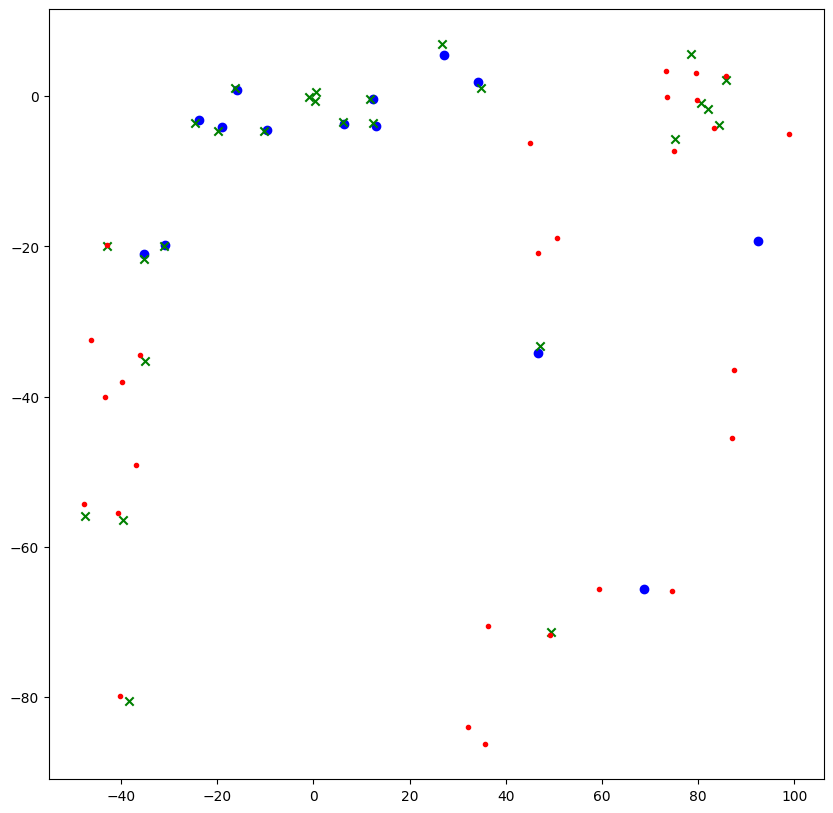

In [4]:
idx_frame = 17
i_case = 2
x_dets = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].get_objects_of('detections')])
x_trus = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].get_objects_of('truths')])
x_igns = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].truths_dontcare])


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.scatter(x_trus[:,0], x_trus[:,1], c='blue', marker='o')
plt.scatter(x_dets[:,0], x_dets[:,1], c='green', marker='x')
plt.scatter(x_igns[:,0], x_igns[:,1], c='red', marker='.')
plt.show()

# Trade Study 2: Using real detections at different distances

In [5]:
# constants over all experiments
li_perception = 'pointpillars'
ca_perception = None
tracking = 'basic-box-tracker'
sensor_eval = 'main_lidar'
sensor_eval_super = 'ego'  # to filter out ones from collabs that are behind buildings
filter_front = False
max_lidar_range = 25
max_framerate = 10

# communication range in units of meters
collab_range = {1:70,
                2:70,
                3:70,
                4:None}

# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:None,
                2:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                3:[s**s for s in [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]],
                4:None}

# communication rates in Hz
collab_rate = {1:10,
               2:10,
               3:5,
               4:None}

# source of the collaborative sensing
collab_source = {1:'ground_truth',
                 2:'ground_truth',
                 3:'ground_truth',
                 4:None}

# sensors to use from our dataset
all_collab_sensors = [f'LIDAR_INFRASTRUCTURE_{d:03d}' for d in range(1,40,1)]
collab_sensors = {1:all_collab_sensors,
                  2:all_collab_sensors,
                  3:all_collab_sensors,
                  4:None}

# trade study type
trade_types = {1:'collaborative',
               2:'collaborative',
               3:'collaborative',
               4:'standard'}

# AV configurations
vs = avstack.ego.vehicle
AVs = {1:vs.LidarCollabPerceptionAndTrackingVehicle,
       2:vs.LidarCollabPerceptionAndTrackingVehicle,
       3:vs.LidarCollabPerceptionAndTrackingVehicle,
       4:vs.LidarPerceptionAndTrackingVehicle}
SMs = [CSM]

In [6]:
save_file_base = 'study-3-collaborative-{}-seq-res-EXP2.p'
max_dist = 70
frame_res_all, seq_res_all = avapi.evaluation.run_trades(SMs, AVs, li_perception, ca_perception, tracking,
                            max_dist=max_dist, max_lidar_range=max_lidar_range, max_framerate=max_framerate,
                            trade_type=trade_types, sensor_eval=sensor_eval, sensor_eval_super=sensor_eval_super,
                            collaborative_sensors=collab_sensors, n_cases_max=4,
                            collaborative_range=collab_range, collaborative_noise=collab_noise,
                            collaborative_source=collab_source, collaborative_rate=collab_rate,
                            n_trials_max=2, frame_start=120, max_frames=50, filter_front=filter_front,
                            save_file_base=save_file_base)

/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


Running dataset CARLA over 1 trials
   Running trial 0, using index 0
load checkpoint from local path: /home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/work_dirs/carla/hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_carla-3d.pth
      Running dataset: CARLA, case 1


100%|███████████████████████| 50/50 [00:03<00:00, 15.09it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

10 eval_sequence(run_2022_10_31_13:34:52, no-name)                        1.5000 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

11 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                 

100%|███████████████████████| 50/50 [00:22<00:00,  2.25it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 409, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 151, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363892773892773, 'Metrics_tracking_HOTA_HOTA': array([0.79881251, 0.79881251, 0.79881251, 0.79881251, 0.79881251,
       0.79881251, 0.79881251, 0.79881251, 0.79881251, 0.79881251,
       0.79881251, 0.79881251, 0.79881251, 0.79881251, 0.79881251,
       0.79881251, 0.79881251, 0.79881251, 0.79881251]), 'Metrics_tracking_HOTA_DetA': array([0.69946809, 0.69946809, 0.69946809, 0.69946809, 0.69946809,
       0.69946809, 0.69946809, 0.69946809, 0.69946809, 0.69946809,
       0.69946809, 0.69946809, 0.69946809, 0.69946809, 0.69946809,
       0.69946809, 0.69946809, 0.69946809, 0.69946809]), 'Metrics_tracking_HOTA_AssA': array([0.91226668, 0.91226668, 0.91226668, 0.91226668, 0.9122

100%|███████████████████████| 50/50 [00:03<00:00, 13.87it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

12 eval_sequence(run_2022_10_31_13:34:52, no-name)                        1.5159 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

13 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                 

100%|███████████████████████| 50/50 [00:25<00:00,  1.93it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 409, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 151, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363892773892773, 'Metrics_tracking_HOTA_HOTA': array([0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139,
       0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139,
       0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139, 0.7729139,
       0.7729139]), 'Metrics_tracking_HOTA_DetA': array([0.69179894, 0.69179894, 0.69179894, 0.69179894, 0.69179894,
       0.69179894, 0.69179894, 0.69179894, 0.69179894, 0.69179894,
       0.69179894, 0.69179894, 0.69179894, 0.69179894, 0.69179894,
       0.69179894, 0.69179894, 0.69179894, 0.69179894]), 'Metrics_tracking_HOTA_AssA': array([0.86353977, 0.86353977, 0.86353977, 0.86353977, 0.86353977,
       0.8635

100%|███████████████████████| 50/50 [00:03<00:00, 15.75it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

14 eval_sequence(run_2022_10_31_13:34:52, no-name)                        1.4704 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

15 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                 

100%|███████████████████████| 50/50 [00:21<00:00,  2.38it/s]
/home/spencer/Documents/Projects/AVstack/avstack-studies/submodules/lib-avstack-core/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 409, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 151, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363892773892773, 'Metrics_tracking_HOTA_HOTA': array([0.78826619, 0.78826619, 0.78826619, 0.78826619, 0.78826619,
       0.78826619, 0.78826619, 0.78826619, 0.78552505, 0.78552505,
       0.78552505, 0.78552505, 0.78552505, 0.78552505, 0.78289988,
       0.78289988, 0.78289988, 0.78289988, 0.77836026]), 'Metrics_tracking_HOTA_DetA': array([0.67423231, 0.67423231, 0.67423231, 0.67423231, 0.67423231,
       0.67423231, 0.67423231, 0.67423231, 0.672     , 0.672     ,
       0.672     , 0.672     , 0.672     , 0.672     , 0.66977364,
       0.66977364, 0.66977364, 0.66977364, 0.66533865]), 'Metrics_tracking_HOTA_AssA': array([0.92158678, 0.92158678, 0.92158678, 0.92158678, 0.9215

100%|███████████████████████| 50/50 [00:01<00:00, 25.67it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating no-name

16 eval_sequence(run_2022_10_31_13:34:52, no-name)                        1.2219 sec

CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

17 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                 

100%|███████████████████████| 50/50 [00:28<00:00,  1.74it/s]

{'Case': 4, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 409, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 151, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7363892773892773, 'Metrics_tracking_HOTA_HOTA': array([0.74109914, 0.74109914, 0.74109914, 0.74109914, 0.74109914,
       0.74109914, 0.74109914, 0.74109914, 0.74109914, 0.74109914,
       0.74109914, 0.74109914, 0.74109914, 0.74109914, 0.74109914,
       0.74109914, 0.74109914, 0.74109914, 0.74109914]), 'Metrics_tracking_HOTA_DetA': array([0.60855263, 0.60855263, 0.60855263, 0.60855263, 0.60855263,
       0.60855263, 0.60855263, 0.60855263, 0.60855263, 0.60855263,
       0.60855263, 0.60855263, 0.60855263, 0.60855263, 0.60855263,
       0.60855263, 0.60855263, 0.60855263, 0.60855263]), 'Metrics_tracking_HOTA_AssA': array([0.90251508, 0.90251508, 0.90251508, 0.90251508, 0.9025

<Figure size 640x480 with 0 Axes>

In [8]:
DM = CSM.get_scene_dataset_by_index(0)

# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                2:[s**2 for s in [0.1, 0.1, 0.1, 0.5, 0.5, 2]],
                3:[s**s for s in [0.05, 0.05, 0.05, 0.25, 0.25, 0.25]],
                4:None}

n_assign = []
for i_test in range(1,4):
    n_assign_this = []
    for i_trial in range(100):
        objs_1 = DM.get_objects(frame=10, sensor='LIDAR_INFRASTRUCTURE_001')
        for obj in objs_1:
            obj.box.add_noise(collab_noise[i_test])

        objs_2 = DM.get_objects(frame=12, sensor='LIDAR_INFRASTRUCTURE_001')
        for obj in objs_2:
            obj.box.add_noise(collab_noise[i_test])

        A_noise = avstack.modules.assignment.build_A_from_iou([obj.box for obj in objs_1], [obj.box for obj in objs_2])
        n_assign_this.append(np.sum(A_noise!=0))
    n_assign.append(n_assign_this)
        #     print(len(objs_1), len(objs_2), np.sum(A_noise!=0))

(array([[ 0.,  1.,  1., 11., 17., 23., 40.,  4.,  2.,  1.],
        [ 4.,  8.,  9., 39., 22., 13.,  5.,  0.,  0.,  0.],
        [ 0.,  0.,  3., 16., 14., 22., 31., 10.,  3.,  1.]]),
 array([ 2. ,  3.3,  4.6,  5.9,  7.2,  8.5,  9.8, 11.1, 12.4, 13.7, 15. ]),
 <a list of 3 BarContainer objects>)

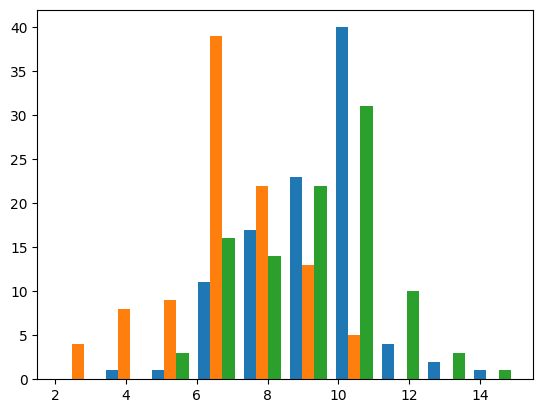

In [9]:
import matplotlib.pyplot as plt
plt.hist(n_assign)